In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [36]:
import tensorflow as tf

In [3]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

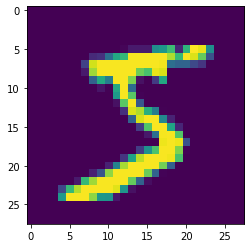

In [4]:
plt.imshow(xtrain[0])

In [5]:
# scaling images
xtrain = xtrain/255
xtest = xtest/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Reshape
from tensorflow.keras.optimizers import SGD 

In [8]:
# buliding stacked hidden layers
# i.e. to reduce the dimensionality step by step until the desired dimension is obtained

In [9]:
xtrain[0].shape

(28, 28)

In [21]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [22]:


decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [23]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [24]:
autoencoder.fit(xtrain,xtrain,epochs=5,validation_data = [xtest,xtest])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 31s 513us/sample - loss: 0.2559 - accuracy: 0.7919 - val_loss: 0.2300 - val_accuracy: 0.7917
Epoch 2/5
60000/60000 [==============================] - 20s 331us/sample - loss: 0.1986 - accuracy: 0.7965 - val_loss: 0.1694 - val_accuracy: 0.8003
Epoch 3/5
60000/60000 [==============================] - 21s 342us/sample - loss: 0.1631 - accuracy: 0.8017 - val_loss: 0.1518 - val_accuracy: 0.8037
Epoch 4/5
60000/60000 [==============================] - 21s 344us/sample - loss: 0.1496 - accuracy: 0.8038 - val_loss: 0.1449 - val_accuracy: 0.8054
Epoch 5/5
60000/60000 [==============================] - 20s 331us/sample - loss: 0.1425 - accuracy: 0.8052 - val_loss: 0.1426 - val_accuracy: 0.8058


In [25]:
passed_images = autoencoder.predict(xtest[:10])

original image


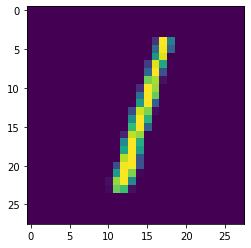

Attempted Reconstruction using AutoEncoder


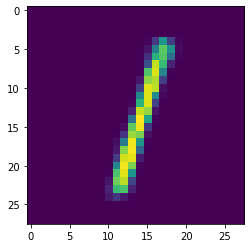

In [29]:
n = 2

print("original image")
plt.imshow(xtest[n])
plt.show()
print("Attempted Reconstruction using AutoEncoder")
plt.imshow(passed_images[n])

### Denoising Images

In [30]:
from tensorflow.keras.layers import GaussianNoise

In [31]:
sample = GaussianNoise(0.2)

In [32]:
noisey = sample(xtest[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



original image


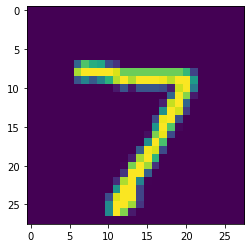

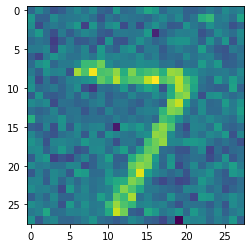

In [33]:
n= 0 
print("original image")
plt.imshow(xtest[n])
plt.show()

plt.imshow(noisey[n])
plt.show()

#### Noise removing using autoencoders

In [38]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [39]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [40]:
noiseremover = Sequential([encoder,decoder])
noiseremover.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [42]:
noiseremover.fit(xtrain,xtrain,epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 32s 528us/sample - loss: 0.1713 - accuracy: 0.8011
Epoch 2/8
60000/60000 [==============================] - 28s 464us/sample - loss: 0.1297 - accuracy: 0.8080
Epoch 3/8
60000/60000 [==============================] - 26s 441us/sample - loss: 0.1217 - accuracy: 0.8094
Epoch 4/8
60000/60000 [==============================] - 27s 445us/sample - loss: 0.1168 - accuracy: 0.8103- loss:
Epoch 5/8
60000/60000 [==============================] - 27s 449us/sample - loss: 0.1124 - accuracy: 0.8110
Epoch 6/8
60000/60000 [==============================] - 27s 448us/sample - loss: 0.1090 - accuracy: 0.8115- loss: 0.1090 - ac
Epoch 7/8
60000/60000 [==============================] - 27s 452us/sample - loss: 0.1068 - accuracy: 0.8119
Epoch 8/8
60000/60000 [==============================] - 28s 460us/sample - loss: 0.1052 - accuracy: 0.8121


In [43]:
ten_noisey_images = sample(xtest[:10],training=True)

In [45]:
denoised_images = noiseremover(ten_noisey_images)

orginal Image


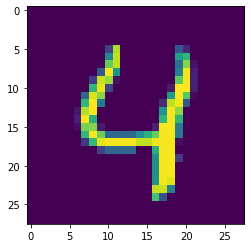

noise Added image


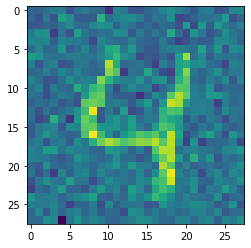

After noise removal from autoencoder 


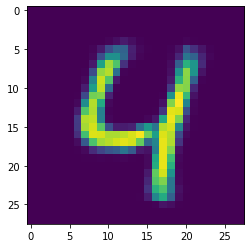

In [47]:
n = 4

print("orginal Image")
plt.imshow(xtest[n])
plt.show()
print("noise Added image")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After noise removal from autoencoder ")
plt.imshow(denoised_images[n])
plt.show()